In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from VisionUtils import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFpr, mutual_info_classif
import numpy as np
import tensorflow as tf

In [5]:
tf.enable_eager_execution()

In [6]:
feat1 = np.load("features/feat1.npy")
feat2 = np.load("features/feat2.npy")
labels = np.load("features/labels.npy")

In [7]:
def trans(feat1, feat2):
    f1 = [feat1[i1].reshape(-1,1) for i1 in range(len(feat1))]
    f2 = [feat2[i2].reshape(-1,1) for i2 in range(len(feat2))]
    cos_d = np.array([feat_distance_cosine_scalar(f1[i].T, f2[i]) for i in range(len(feat1))])
    cos_d = cos_d.reshape(-1,1)
    sqr_diff = np.power(np.abs(feat1- feat2), 2)
    rat = feat1/feat2
    data = np.hstack([cos_d, sqr_diff])
    return data

In [8]:
data = trans(feat1, feat2)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [9]:

xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, labels, 
                                                shuffle = True, random_state = 42)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.regularizers import l1, l2
he_init = tf.keras.initializers.VarianceScaling()

model = Sequential()
model.add(Dense( 128, activation = 'relu', kernel_initializer = he_init, 
                kernel_regularizer = l1(0.001), 
                #input_shape = (1,128)
               ))
model.add(Dense(32, activation = 'relu',kernel_initializer = he_init))
model.add(Dense(1, activation = "tanh", kernel_initializer = he_init))

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
mcp = ModelCheckpoint("models_chpt/best_modelD.hdf5",verbose = 1, 
                      monitor = "val_loss", save_best_only = True, save_weights_only = True)
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor =0.5)
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer = opt, loss = "binary_crossentropy", 
              metrics = ["accuracy"] )

In [12]:
bz = 1000
epochs = 400
history = model.fit(
    xtrain,
    ytrain,
    epochs = epochs,
    batch_size = bz,
    validation_data =(xtest, ytest),
    callbacks = [mcp, red_lr]
)


W0819 13:03:09.438328  9756 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 21450 samples, validate on 7150 samples
Epoch 1/400
18000/21450 [========================>.....] - ETA: 0s - loss: 2.0038 - acc: 0.5011
Epoch 00001: val_loss improved from inf to 1.32453, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 17us/sample - loss: 1.9097 - acc: 0.5443 - val_loss: 1.3245 - val_acc: 0.8860
Epoch 2/400
21000/21450 [============================>.] - ETA: 0s - loss: 1.0395 - acc: 0.8788
Epoch 00002: val_loss improved from 1.32453 to 0.80829, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 4us/sample - loss: 1.0348 - acc: 0.8790 - val_loss: 0.8083 - val_acc: 0.8961
Epoch 3/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.8202 - acc: 0.8880
Epoch 00003: val_loss improved from 0.80829 to 0.59163, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 4us/sample - loss: 0.7022 - acc: 0.8923 - val_loss: 0.5916 

Epoch 28/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2847 - acc: 0.8980
Epoch 00028: val_loss did not improve from 0.28593
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2967 - acc: 0.8926 - val_loss: 0.2989 - val_acc: 0.8929
Epoch 29/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2715 - acc: 0.9070
Epoch 00029: val_loss did not improve from 0.28593
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2896 - acc: 0.8917 - val_loss: 0.2861 - val_acc: 0.8950
Epoch 30/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2911 - acc: 0.8860
Epoch 00030: val_loss improved from 0.28593 to 0.28151, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2865 - acc: 0.8929 - val_loss: 0.2815 - val_acc: 0.8969
Epoch 31/400
19000/21450 [=========================>....] - ETA: 0s - loss: 0.2820 - acc: 0.8953
Epoch 00031: val_loss did no

 1000/21450 [>.............................] - ETA: 0s - loss: 0.2428 - acc: 0.9080
Epoch 00056: val_loss did not improve from 0.26890
21450/21450 [==============================] - 0s 2us/sample - loss: 0.2708 - acc: 0.8926 - val_loss: 0.2692 - val_acc: 0.8975
Epoch 57/400
17000/21450 [======================>.......] - ETA: 0s - loss: 0.2698 - acc: 0.8952
Epoch 00057: val_loss did not improve from 0.26890
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2703 - acc: 0.8946 - val_loss: 0.2760 - val_acc: 0.8945
Epoch 58/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2877 - acc: 0.8950
Epoch 00058: val_loss improved from 0.26890 to 0.26853, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2693 - acc: 0.8943 - val_loss: 0.2685 - val_acc: 0.8987
Epoch 59/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2731 - acc: 0.8870
Epoch 00059: val_loss did not improve fro

 1000/21450 [>.............................] - ETA: 0s - loss: 0.2688 - acc: 0.8960
Epoch 00085: val_loss improved from 0.26741 to 0.26286, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2656 - acc: 0.8919 - val_loss: 0.2629 - val_acc: 0.8979
Epoch 86/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2478 - acc: 0.8980
Epoch 00086: val_loss improved from 0.26286 to 0.26170, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2598 - acc: 0.8957 - val_loss: 0.2617 - val_acc: 0.8976
Epoch 87/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2559 - acc: 0.8980
Epoch 00087: val_loss improved from 0.26170 to 0.26107, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2589 - acc: 0.8954 - val_loss: 0.2611 - val_acc: 0.8985
Epoch 88/400
 1000/21450 [>...........

 1000/21450 [>.............................] - ETA: 0s - loss: 0.2418 - acc: 0.8940
Epoch 00113: val_loss did not improve from 0.25739
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2530 - acc: 0.8965 - val_loss: 0.2580 - val_acc: 0.8975
Epoch 114/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2724 - acc: 0.8870
Epoch 00114: val_loss did not improve from 0.25739
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2537 - acc: 0.8964 - val_loss: 0.2589 - val_acc: 0.8976
Epoch 115/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2521 - acc: 0.8970
Epoch 00115: val_loss did not improve from 0.25739
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2539 - acc: 0.8959 - val_loss: 0.2575 - val_acc: 0.8985
Epoch 116/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2446 - acc: 0.9020
Epoch 00116: val_loss did not improve from 0.25739
21450/21450 [========================

Epoch 142/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2485 - acc: 0.8930
Epoch 00142: val_loss did not improve from 0.25472
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2495 - acc: 0.8966 - val_loss: 0.2549 - val_acc: 0.8976
Epoch 143/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2186 - acc: 0.9180
Epoch 00143: val_loss improved from 0.25472 to 0.25470, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2497 - acc: 0.8966 - val_loss: 0.2547 - val_acc: 0.8979
Epoch 144/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2743 - acc: 0.8880
Epoch 00144: val_loss did not improve from 0.25470
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2497 - acc: 0.8967 - val_loss: 0.2552 - val_acc: 0.8978
Epoch 145/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2546 - acc: 0.8970
Epoch 00145: val_loss im

 1000/21450 [>.............................] - ETA: 0s - loss: 0.2346 - acc: 0.9040
Epoch 00170: val_loss improved from 0.25384 to 0.25384, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2482 - acc: 0.8966 - val_loss: 0.2538 - val_acc: 0.8975
Epoch 171/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2302 - acc: 0.9090
Epoch 00171: val_loss did not improve from 0.25384
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2482 - acc: 0.8965 - val_loss: 0.2538 - val_acc: 0.8975
Epoch 172/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2566 - acc: 0.9000
Epoch 00172: val_loss did not improve from 0.25384
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2483 - acc: 0.8967 - val_loss: 0.2539 - val_acc: 0.8975
Epoch 173/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2617 - acc: 0.8820
Epoch 00173: val_loss improved from 0.

Epoch 198/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2562 - acc: 0.8920
Epoch 00198: val_loss did not improve from 0.25364
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8969 - val_loss: 0.2537 - val_acc: 0.8976
Epoch 199/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2323 - acc: 0.9020
Epoch 00199: val_loss did not improve from 0.25364
21450/21450 [==============================] - 0s 2us/sample - loss: 0.2479 - acc: 0.8969 - val_loss: 0.2536 - val_acc: 0.8975
Epoch 200/400
20000/21450 [==========================>...] - ETA: 0s - loss: 0.2473 - acc: 0.8969
Epoch 00200: val_loss improved from 0.25364 to 0.25362, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 4us/sample - loss: 0.2479 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8975
Epoch 201/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2232 - acc: 0.9030
Epoch 00201: val_loss im

 1000/21450 [>.............................] - ETA: 0s - loss: 0.2435 - acc: 0.9120
Epoch 00225: val_loss did not improve from 0.25359
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8967 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 226/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2489 - acc: 0.8900
Epoch 00226: val_loss did not improve from 0.25359
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8967 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 227/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2569 - acc: 0.8890
Epoch 00227: val_loss improved from 0.25359 to 0.25359, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8967 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 228/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2461 - acc: 0.8930
Epoch 00228: val_loss improved from 0.

Epoch 253/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2324 - acc: 0.9000
Epoch 00253: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 254/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2443 - acc: 0.8950
Epoch 00254: val_loss improved from 0.25358 to 0.25358, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 255/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2591 - acc: 0.8900
Epoch 00255: val_loss improved from 0.25358 to 0.25358, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2479 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 256/400
 1000/21450 [>.............................] - ETA: 0s - l

Epoch 00280: val_loss improved from 0.25358 to 0.25358, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 281/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2340 - acc: 0.8970
Epoch 00281: val_loss improved from 0.25358 to 0.25358, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 4us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 282/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2494 - acc: 0.8960
Epoch 00282: val_loss improved from 0.25358 to 0.25358, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 283/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2158 - acc: 0.9030
Epoch 00283: val_loss 

Epoch 00308: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 309/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2464 - acc: 0.9060
Epoch 00309: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 2us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 310/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2677 - acc: 0.8830
Epoch 00310: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 311/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2498 - acc: 0.9050
Epoch 00311: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0

 1000/21450 [>.............................] - ETA: 0s - loss: 0.2447 - acc: 0.8980
Epoch 00337: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 338/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2479 - acc: 0.9020
Epoch 00338: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 2us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 339/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2477 - acc: 0.8920
Epoch 00339: val_loss improved from 0.25358 to 0.25358, saving model to models_chpt/best_modelD.hdf5
21450/21450 [==============================] - 0s 4us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 340/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2316 - acc: 0.9070
Epoch 00340: val_loss did not improve 

Epoch 367/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2702 - acc: 0.8770
Epoch 00367: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 368/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2602 - acc: 0.8820
Epoch 00368: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 369/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2473 - acc: 0.8930
Epoch 00369: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 370/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2058 - acc: 0.9180
Epoch 00370: val_loss did not improve from 0.25358
21450/21450 [==========

Epoch 397/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2465 - acc: 0.8980
Epoch 00397: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 398/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2629 - acc: 0.8830
Epoch 00398: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 2us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 399/400
20000/21450 [==========================>...] - ETA: 0s - loss: 0.2485 - acc: 0.8965
Epoch 00399: val_loss did not improve from 0.25358
21450/21450 [==============================] - 0s 3us/sample - loss: 0.2478 - acc: 0.8968 - val_loss: 0.2536 - val_acc: 0.8978
Epoch 400/400
 1000/21450 [>.............................] - ETA: 0s - loss: 0.2396 - acc: 0.9100
Epoch 00400: val_loss did not improve from 0.25358
21450/21450 [==========

In [13]:
model.evaluate(xtest, ytest)

7150/7150 [==============================] - 0s 18us/sample - loss: 0.2536 - acc: 0.8978


[0.25357923249264697, 0.89776224]

Text(0.5, 1.0, 'Loss Vs # of epochs')

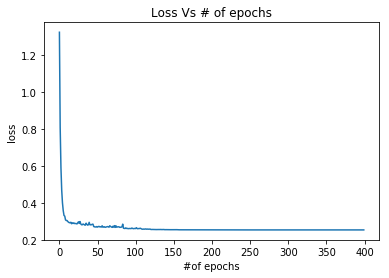

In [14]:
%matplotlib inline 
plt.plot( [i for i in range(epochs)], history.history['val_loss'], label = "validation loss")
plt.xlabel("#of epochs")
plt.ylabel("loss")
plt.title("Loss Vs # of epochs")

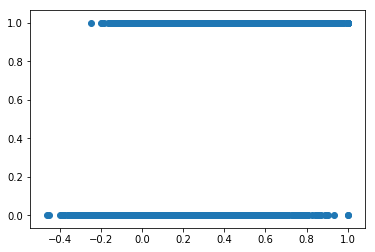

In [8]:
plt.scatter(cos_d, labels)

Text(0.5, 1.0, 'Loss Vs # of epochs')

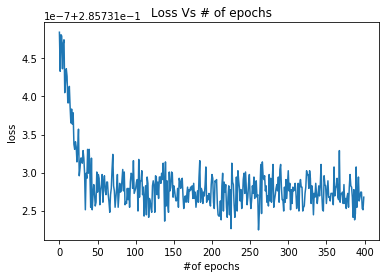

In [43]:
plt.plot([i for i in range(epochs)], history.history['loss'], label = "Train loss")
plt.xlabel("#of epochs")
plt.ylabel("loss")
plt.title("Loss Vs # of epochs")

Text(0.5, 1.0, 'Learning rate Vs # of epochs')

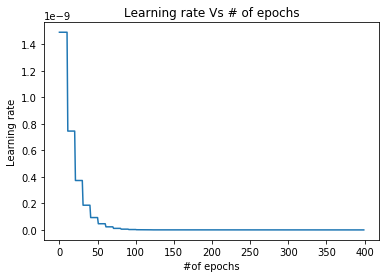

In [44]:
plt.plot([i for i in range(epochs)], history.history['lr'], label = "Train loss")
plt.xlabel("#of epochs")
plt.ylabel("Learning rate")
plt.title("Learning rate Vs # of epochs")

In [45]:
model.evaluate(xtest, ytest)

6000/6000 [==============================] - 0s 15us/sample - loss: 0.2911 - acc: 0.8828


[0.2910575838883718, 0.88283336]

In [46]:
model_best = model

In [47]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [48]:
model_best.load_weights("models_chpt/best_modelD.hdf5")

In [49]:
model_best.evaluate(xtest, ytest)

6000/6000 [==============================] - 0s 16us/sample - loss: 0.2911 - acc: 0.8828


[0.2910575842857361, 0.88283336]